#   IMPORTING LIBRARIES


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to view all the columns and rows -- 
pd.pandas.set_option('display.max_rows',None)

df= pd.read_csv('train.csv')
df.head()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0
1,2,12.109011,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.0,0.0
2,3,12.317167,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,...,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,0.0
3,4,11.849398,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,...,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,0.0


In [14]:
df.shape

(1460, 41)

# DATA ANALYSIS

## FINIDING THE % OF MISSING VALUES IN EVERY FEARTURE

In [20]:
# 1. MAKING LIST OF FEATURES WITH NAN VALUES
feature_NA = [features for features in df.columns if df[features].isnull().sum()>1]
# 2. PRINTING THE  FEATURES HAVING NAN-VALUES WITH NAMES AND MISSING VALUES
for feature in feature_NA :
    print(feature,np.round(df[feature].isnull().mean(),4),'% missing values')

## FINDING RELATIONSHIP BETWEEN MISSING VALUES AND SALESPRCE

In [16]:
for feature in feature_NA :
    data = df.copy()
    #MAKING VARIABLE WHICH WILL INDICATE NULL = 1 AND VALUE = 0 --
    #we are doing this bcz we need to make a count plot
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    # CALCULATING MEAN SALE PRICE WHERE PRICE IS MISSIN G AND PRESENT
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.colormaps
    plt.show()

WE WILL REPLACE THESE NAN VALUES WITH SOMETHING MEANING FULL BCZ THEY ARE HAVING AN IMPACT 
WE WILL REPLACE THEM IN FEATURE ENGRNERING

## REMOVING  FEATURES THAT ARE NOT USEABLE

In [24]:
#  SO NOW ER AR SEEING ONLY ID FEARURE IS NOT USEABLE
print('total number of houses ID {}'.format(len(df.Id)))

total number of houses ID 1460


##  NUMERICAL VARIABLES

In [25]:
#LIST OPF NUMERICAL VARIABLES
numerical_variables = [features for features in df.columns if df[features].dtypes != 'O']
print(' LENGTH OF NUMERICAL FEATURES {}'.format(len(numerical_variables)))

df[numerical_variables].head()

 LENGTH OF NUMERICAL FEATURES 41


,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.418208,0.366344,0.666667,0.500,0.036765,0.098361,0.12250,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0
1,2,12.109011,0.000000,0.495064,0.391317,0.555556,0.875,0.227941,0.524590,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.0,0.0
2,3,12.317167,0.235294,0.434909,0.422359,0.666667,0.500,0.051471,0.114754,0.10125,...,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,0.0
3,4,11.849398,0.294118,0.388581,0.390295,0.666667,0.500,0.669118,0.606557,0.00000,...,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.513123,0.468761,0.777778,0.500,0.058824,0.147541,0.21875,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,0.0


##  SEPRATING YEAR NUMERICAL VALUES

In [26]:
year_feature =[features for features in numerical_variables if 'Year' in features or 'Yr' in features]

In [27]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan']

## ANALYZING DATATIME (TEMPORAL)  VARIABLES

Text(0.5, 1.0, ' YEAR SOLD VS SALE PRICE ')

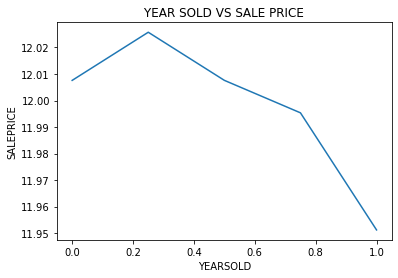

In [28]:
# house price vs year sold
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YEARSOLD')
plt.ylabel('SALEPRICE')
plt.title(' YEAR SOLD VS SALE PRICE ')


THIS GRAPH LOOKS NOT RIGHT BCZ IN THE EARLY YEARS THE SALEPRICE WAS HIGH BUT IT IS BECOMING LOW INSTEAD OF GOING HIGH

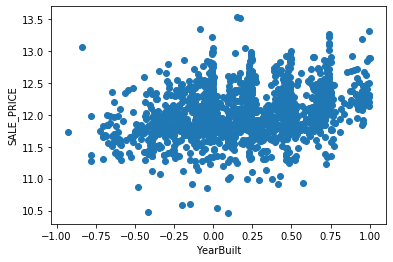

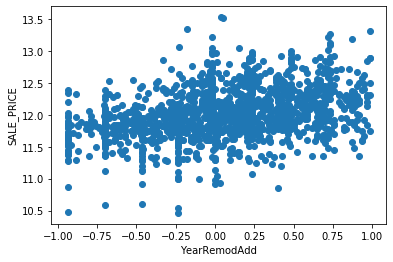

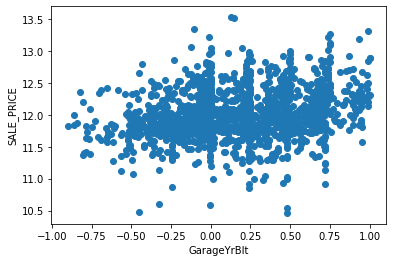

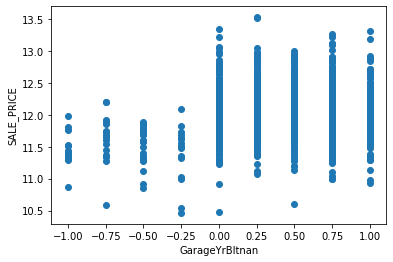

In [29]:
# Comparing the difference btw all the year features with SALEPRICE
for feature in year_feature:
    if feature != 'YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SALE_PRICE')
        plt.show()

1. THE FIRST GRAPG TELLS THAT THE HOUSE WHICH WAS BUILT 140 YEARS BEFORE WAS HAVING VERY LESS 
PRICE COMPARED TO THE HOUSE WHICH IS BUILT JUST BEFORE 
AND SAME AS ALL THE OTHER GRAPHS TELL THE STORY

###  TYPES OF NUMERICAL VARIABLE 

In [30]:
#HTERE ARE 2 TYPES OF NUMERICAL VARIABLES 1. CONTINOUS     2.DISCRETE#
# FINDING DISCRETE FEATURES

DISCRETE_FEATURE = [feature for feature in numerical_variables if len(df[feature].unique())<25 and
                    feature not in year_feature + ['Id']]
print(' LENGTH OF DISCRETE FEATURE IS {}'.format(len(DISCRETE_FEATURE)))

 LENGTH OF DISCRETE FEATURE IS 19


## DISCRETE FEATURES

In [31]:
df[DISCRETE_FEATURE].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,LotFrontagenan,MasVnrAreanan
0,0.235294,0.666667,0.500,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.50,0.0,0.0,0.0,0.090909,0.0,0.0
1,0.000000,0.555556,0.875,0.0,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.50,0.0,0.0,0.0,0.363636,0.0,0.0
2,0.235294,0.666667,0.500,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.50,0.0,0.0,0.0,0.727273,0.0,0.0
3,0.294118,0.666667,0.500,0.0,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.75,0.0,0.0,0.0,0.090909,0.0,0.0
4,0.235294,0.777778,0.500,0.0,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.75,0.0,0.0,0.0,1.000000,0.0,0.0


### FINDING RELATION BTW SALEPRICE AND DISCRETE FREATURE

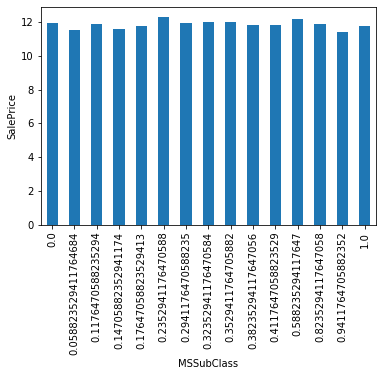

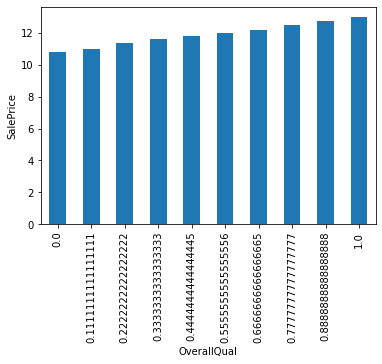

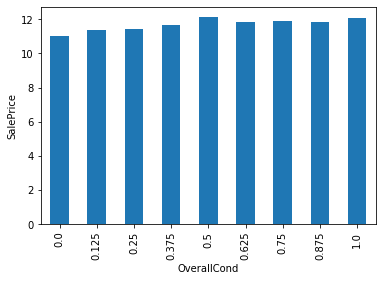

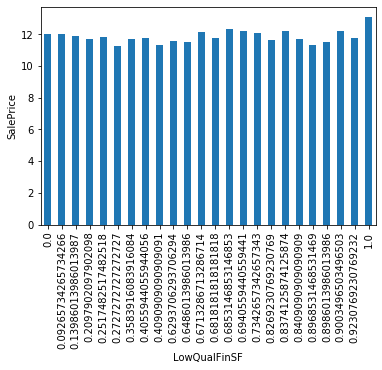

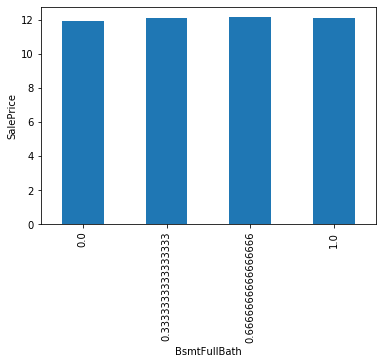

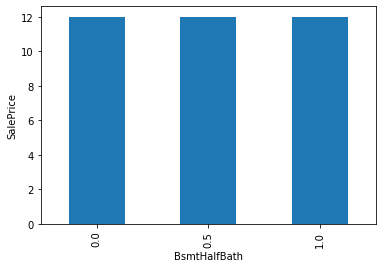

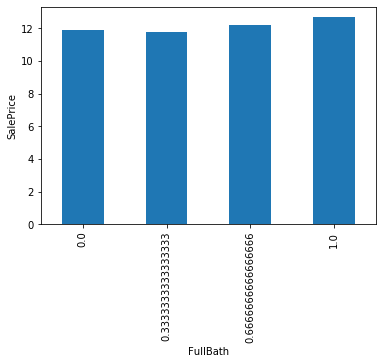

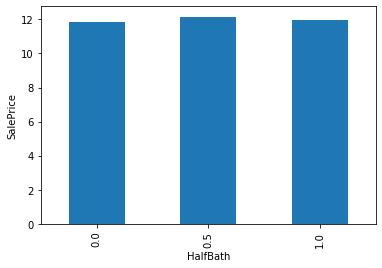

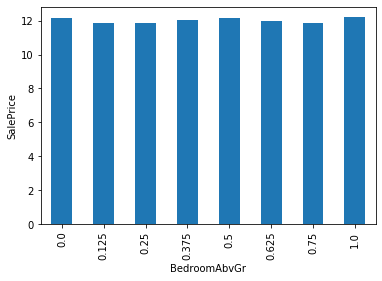

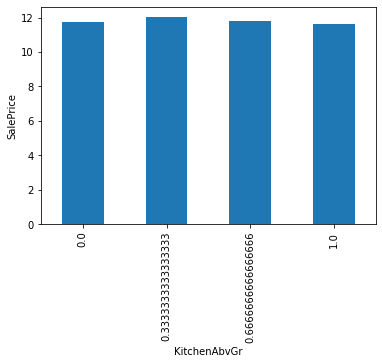

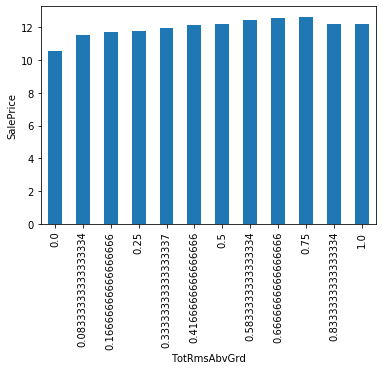

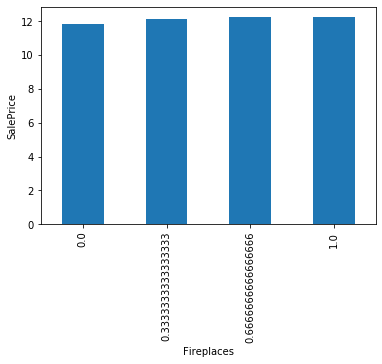

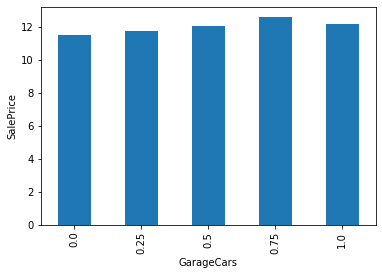

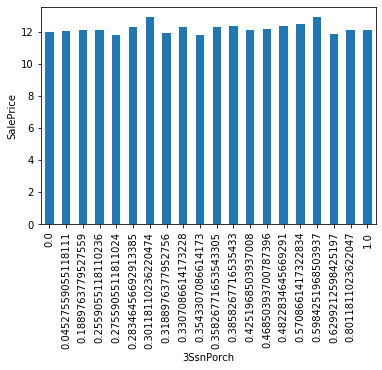

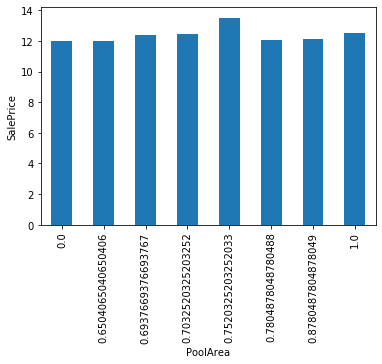

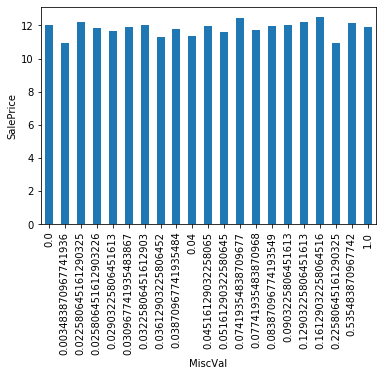

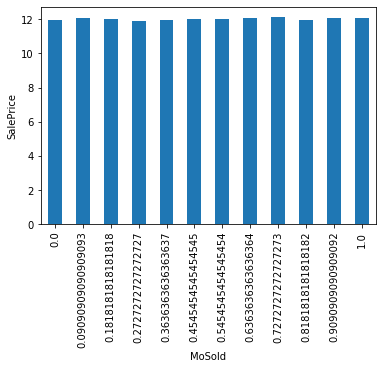

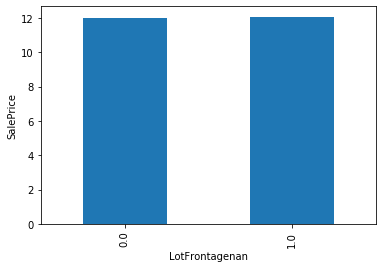

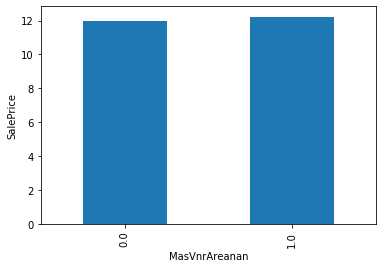

In [32]:
for feature in DISCRETE_FEATURE:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

## CONTINOUS FEATURE 

In [33]:
continous_feature = [feature for feature in numerical_variables if feature not in DISCRETE_FEATURE + year_feature + ['Id']]

In [34]:
 len(continous_feature)

16

### FINDING RELATION BTW SALEPRICE AND CONTINOUS FREATURE

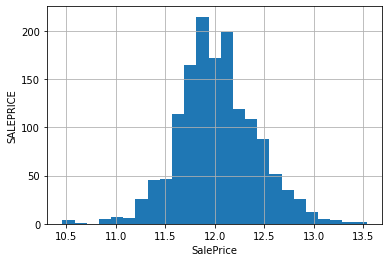

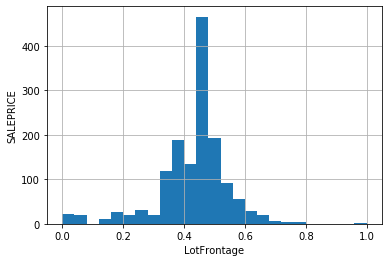

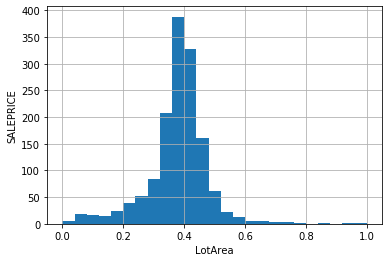

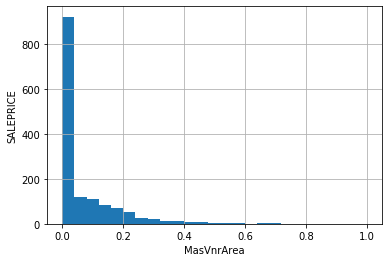

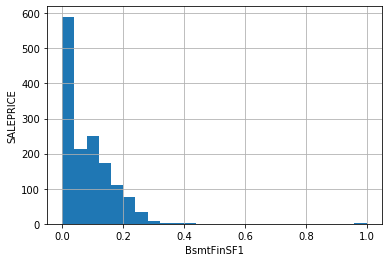

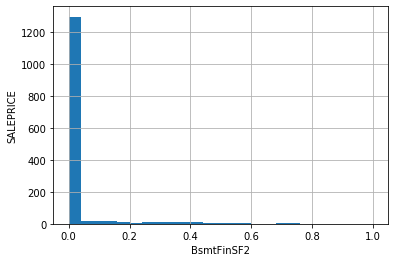

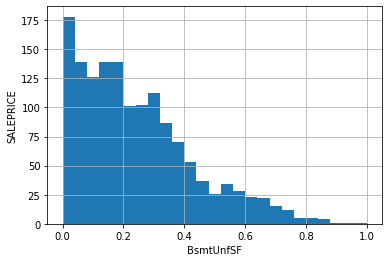

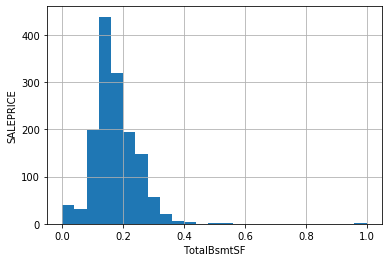

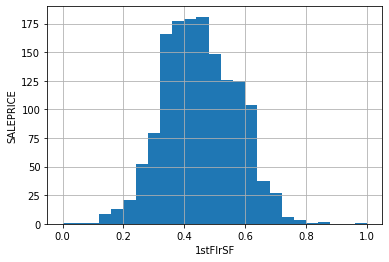

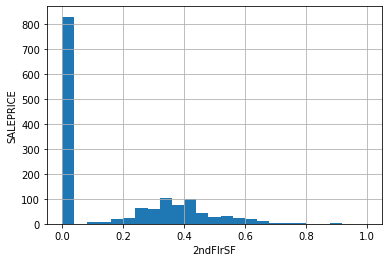

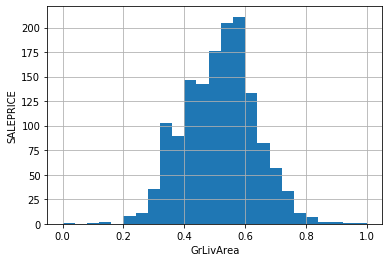

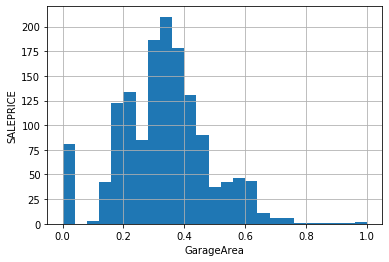

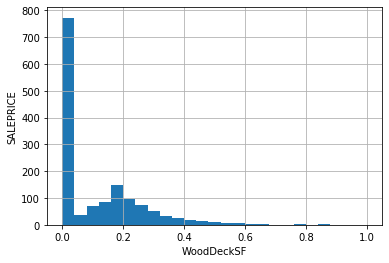

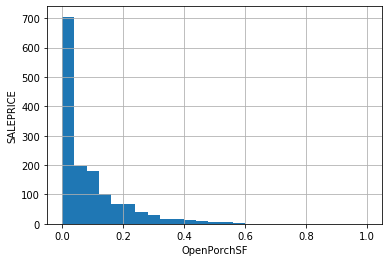

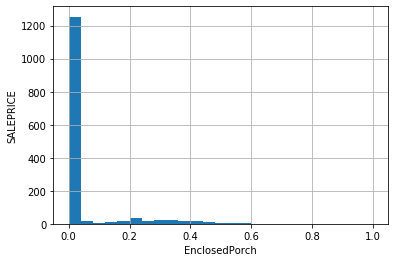

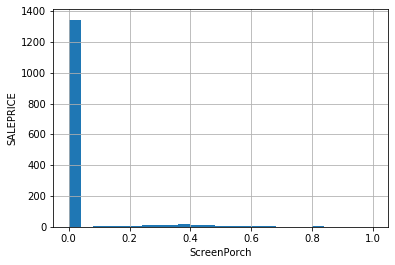

In [35]:
for feature in continous_feature :
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SALEPRICE')
    plt.show()
    

##  LOGARTHIMIC TRANFORMATION IN EDA

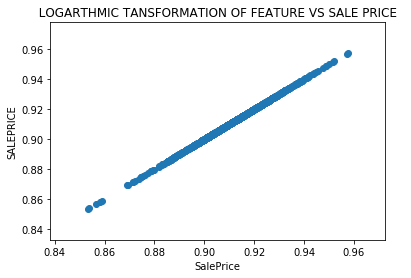

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


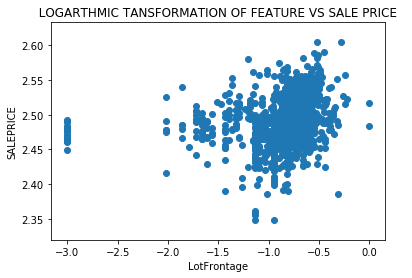

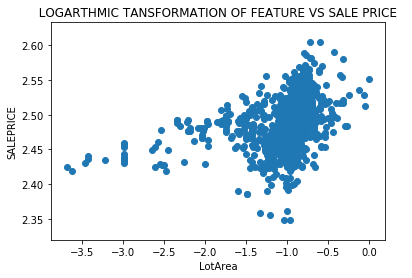

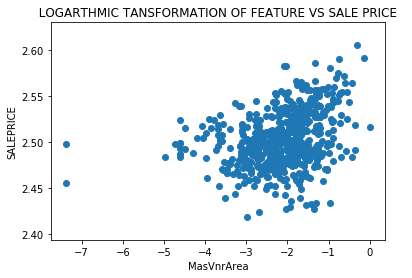

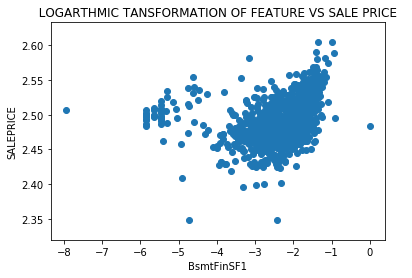

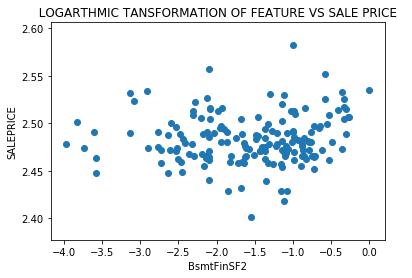

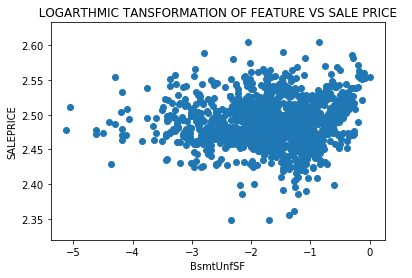

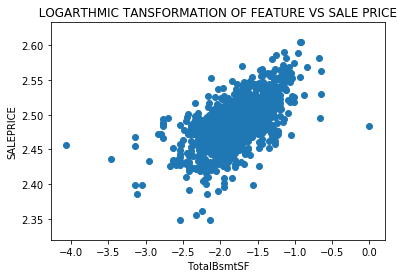

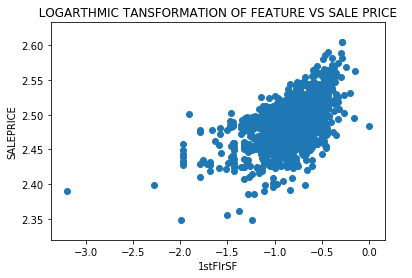

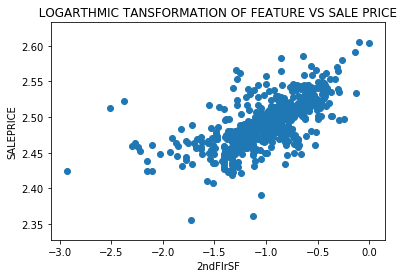

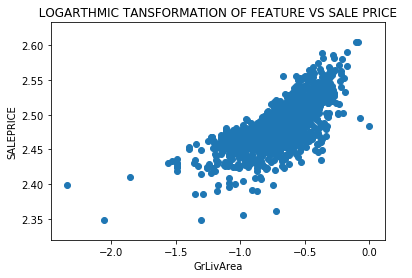

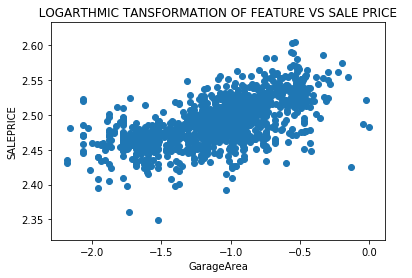

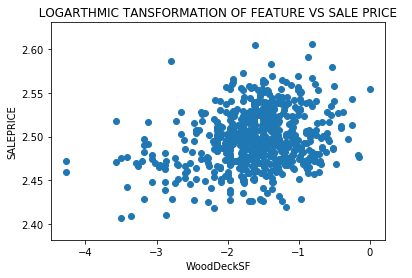

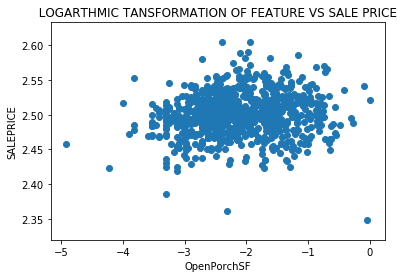

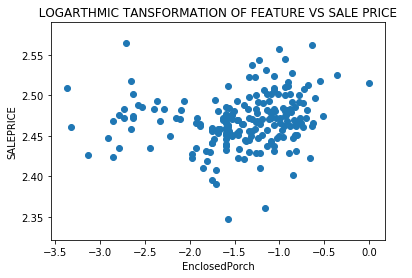

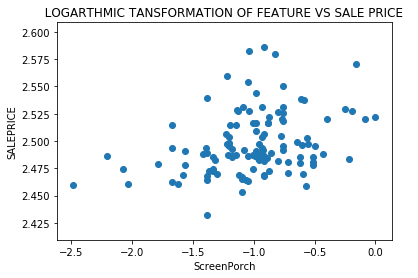

In [36]:
for feature in continous_feature :
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SALEPRICE')
    plt.title('  LOGARTHMIC TANSFORMATION OF FEATURE VS SALE PRICE  ')
    plt.show()

##  FINDING THE OUITLIERS

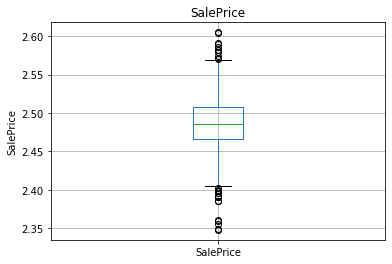

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


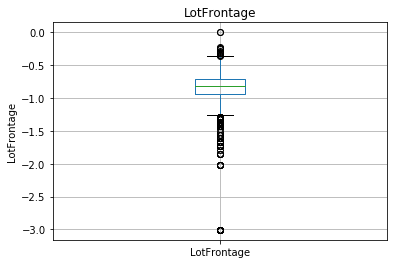

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


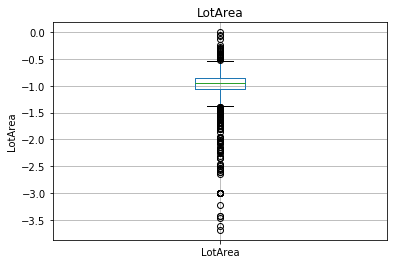

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1237: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


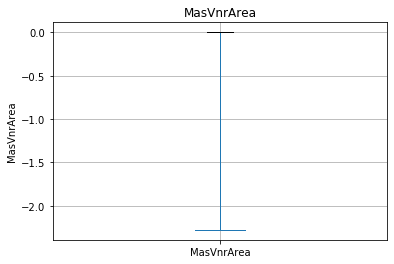

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


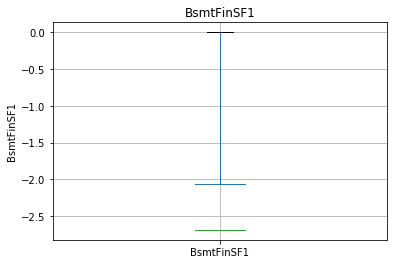

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


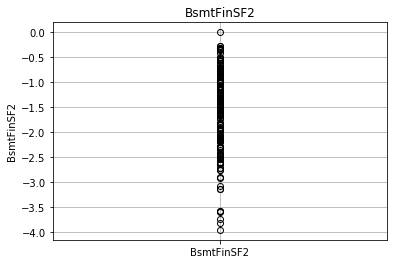

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


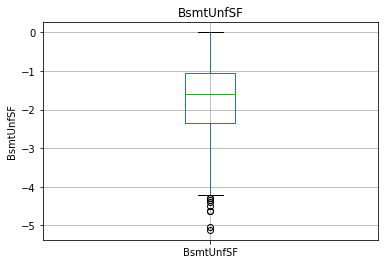

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


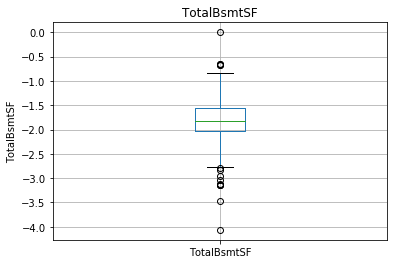

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


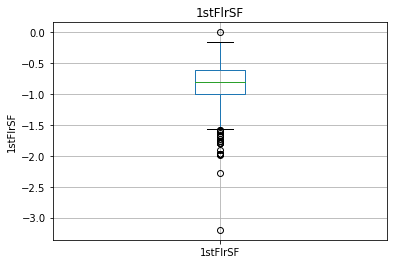

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1237: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


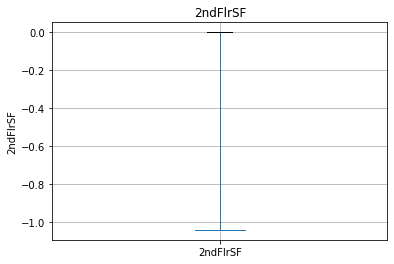

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


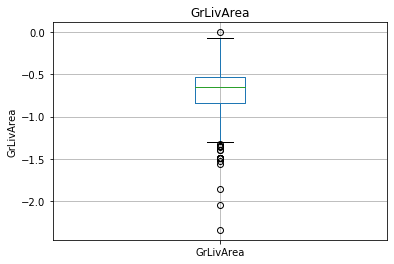

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


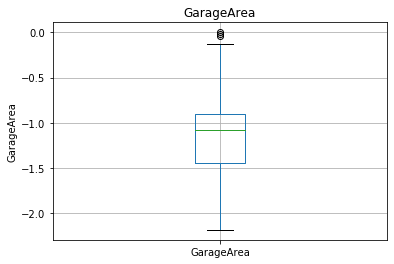

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1237: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


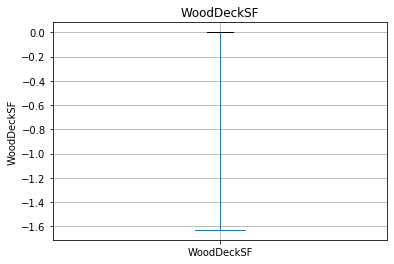

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


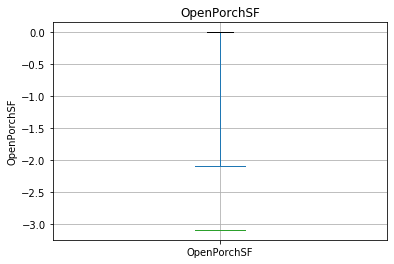

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


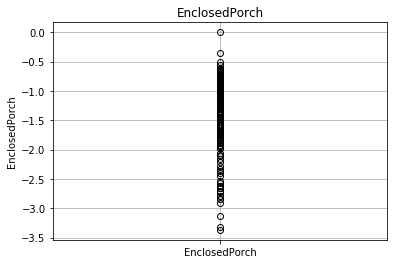

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


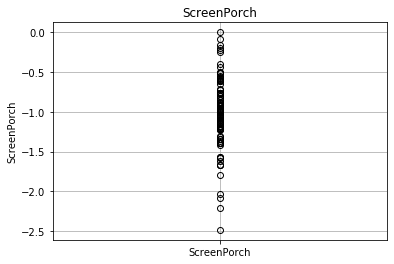

In [37]:
for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

##  CATEGORICAL FEATURES 

In [38]:
categorical_features = [feature for feature in df.columns if data[feature].dtypes=='O']

In [39]:
df[categorical_features].head()


""
0
1
2
3
4


#### FINDING HOW MANY CATEGORIES EACH FEARURE IS HAVING 

In [43]:
for feature in categorical_features :
    print('  THE FEATURE {} IS HAVING {} CATEGORIES  '.format(feature,len(df[feature].unique())))

## FIND RELATION BTW CATEGORICAL AND DEPENDENT FEATURE; 

In [44]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SALEPRICE')
    plt.title(feature)
    plt.show()

In [2]:
def my_func(n1, n2): return n1 + n2 my_func(1, 2, 3)

SyntaxError: invalid syntax (<ipython-input-2-2078d30b2dfb>, line 1)

In [1]:
import datetime 
print(datetime.datetime(1970, 1, 1).strftime('%Y-%d-%B')) 

1970-01-January
